# 5 Machine Learning section.

>Using GridSearchCV with:

>* Logistic Regression.
* MultinomialNB.
* BernoulliNB.
* RandomForestClassifier.
* AdaBoostClassifier.
* GradientBoostingClassifier.

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import nltk
import nlp_ml_functions
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer, binarize, FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
sns.set_style('white')

## Using `relevance` as labels.

### Loading dataset into a pandas dataframe.

In [3]:
balanced_df = pd.read_pickle("balanced_df")

##  1 - Creating models using GridSearchCV.

In [4]:
X_article = balanced_df['article_text']
y_article = balanced_df['relevance']

In [5]:
X_train_article, X_test_article, y_train_article, y_test_article = train_test_split(X_article, y_article, test_size=0.3, random_state=42)

### Logistic Regression.

In [6]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', LogisticRegression())])

In [7]:
# The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
parameters = {'classifier__penalty':['l2'], 
              'classifier__solver':['newton-cg','lbfgs', 'liblinear'], 
              'classifier__max_iter': [100,200],
              'classifier__random_state': [1]}

In [8]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [9]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 19.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'classifier__penalty': ['l2'], 'classifier__max_iter': [100, 200], 'classifier__random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [10]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__max_iter': 100, 'classifier__random_state': 1}


In [11]:
best_model = gridsearch.best_estimator_

In [12]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...nalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [13]:
predictions = best_model.predict(X_test_article)

In [15]:
predictions_probability = best_model.predict_proba(X_test_article)

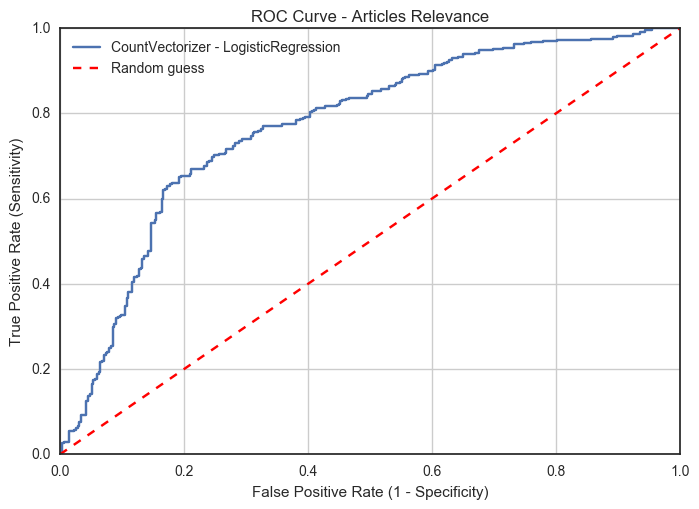

In [16]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - LogisticRegression", "Articles Relevance")

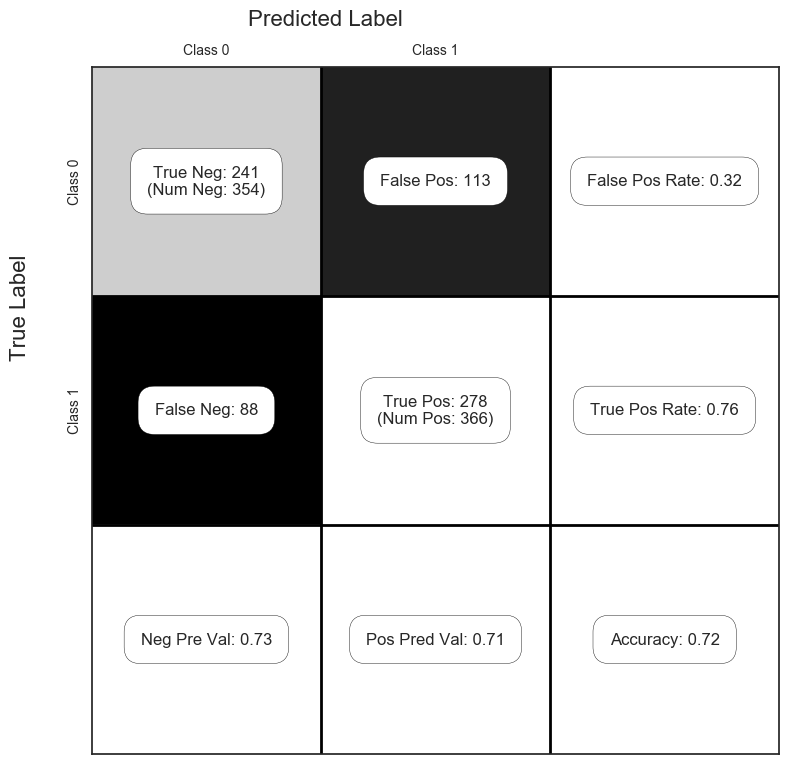

In [17]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [18]:
nlp_ml_functions.classification_metrics("LogisticRegression", y_test_article, predictions)

Precision Score of LogisticRegression model: 71.10%

AUC: 72.02%

Accuracy Score of LogisticRegression model: 72.08%

Recall Score of LogisticRegression model: 75.96%

F1 Score of LogisticRegression model: 73.45%

Classification Report of LogisticRegression:

              precision    recall  f1-score   support

          0       0.73      0.68      0.71       354
          1       0.71      0.76      0.73       366

avg / total       0.72      0.72      0.72       720



In [19]:
# The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
parameters = {'classifier__penalty':['l2','l1'], 
              #'classifier__solver':['newton-cg','lbfgs', 'liblinear'], 
              'classifier__max_iter': [100,200],
              'classifier__random_state': [1]}

In [20]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [21]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 13.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__penalty': ['l2', 'l1'], 'classifier__max_iter': [100, 200], 'classifier__random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [22]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__penalty': 'l2', 'classifier__max_iter': 100, 'classifier__random_state': 1}


In [23]:
best_model = gridsearch.best_estimator_

In [24]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...nalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [25]:
predictions = best_model.predict(X_test_article)

In [26]:
predictions_probability = best_model.predict_proba(X_test_article)

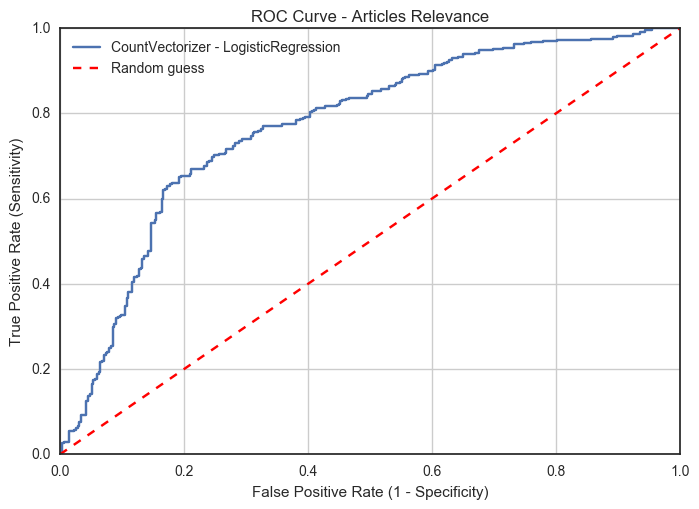

In [27]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - LogisticRegression", "Articles Relevance")

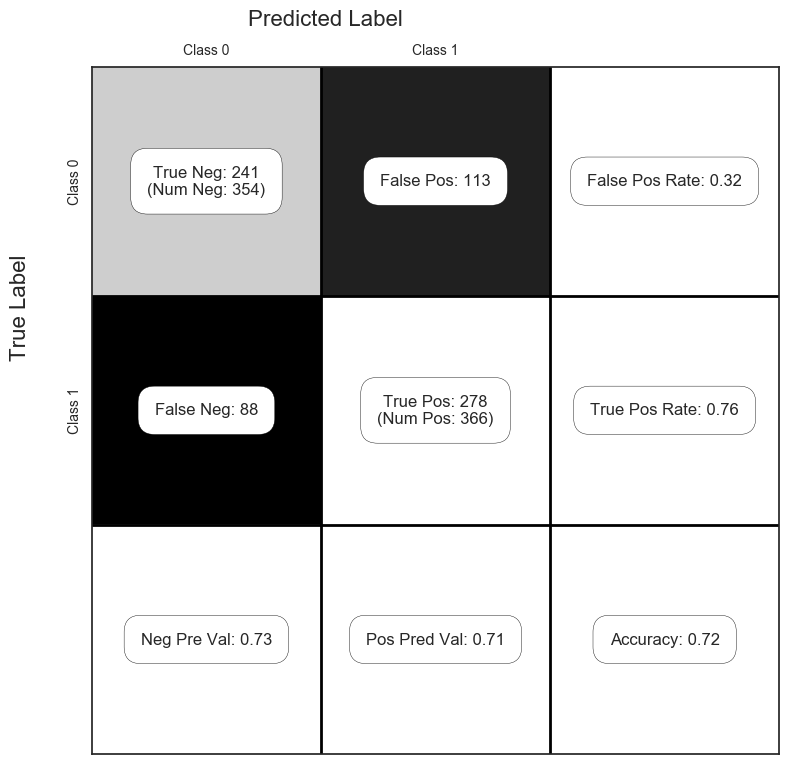

In [28]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [29]:
nlp_ml_functions.classification_metrics("LogisticRegression", y_test_article, predictions)

Precision Score of LogisticRegression model: 71.10%

AUC: 72.02%

Accuracy Score of LogisticRegression model: 72.08%

Recall Score of LogisticRegression model: 75.96%

F1 Score of LogisticRegression model: 73.45%

Classification Report of LogisticRegression:

              precision    recall  f1-score   support

          0       0.73      0.68      0.71       354
          1       0.71      0.76      0.73       366

avg / total       0.72      0.72      0.72       720



### Naive-Bayes Multinomial.

In [30]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', MultinomialNB())])

In [31]:
parameters = {'classifier__alpha':[1,0.5], 
              'classifier__fit_prior': [True,False]}

In [32]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [33]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 13.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__alpha': [1, 0.5], 'classifier__fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [34]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__alpha': 0.5, 'classifier__fit_prior': True}


In [35]:
best_model = gridsearch.best_estimator_

In [36]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))])

In [37]:
predictions = best_model.predict(X_test_article)

In [38]:
predictions_probability = best_model.predict_proba(X_test_article)

#### Model evaluation.

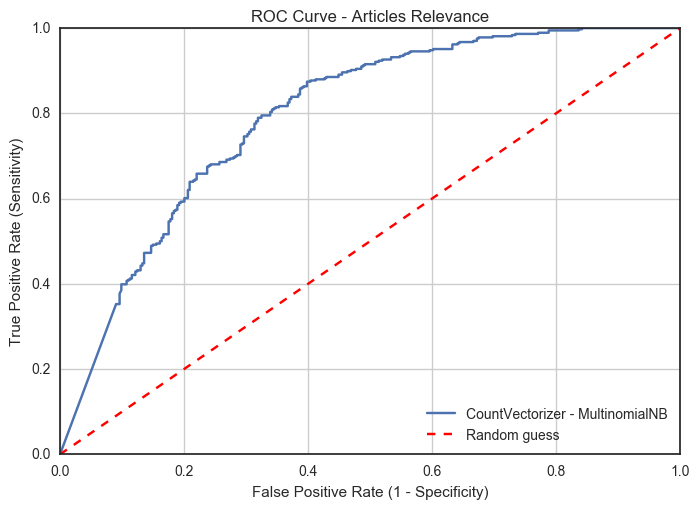

In [39]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - MultinomialNB", "Articles Relevance")

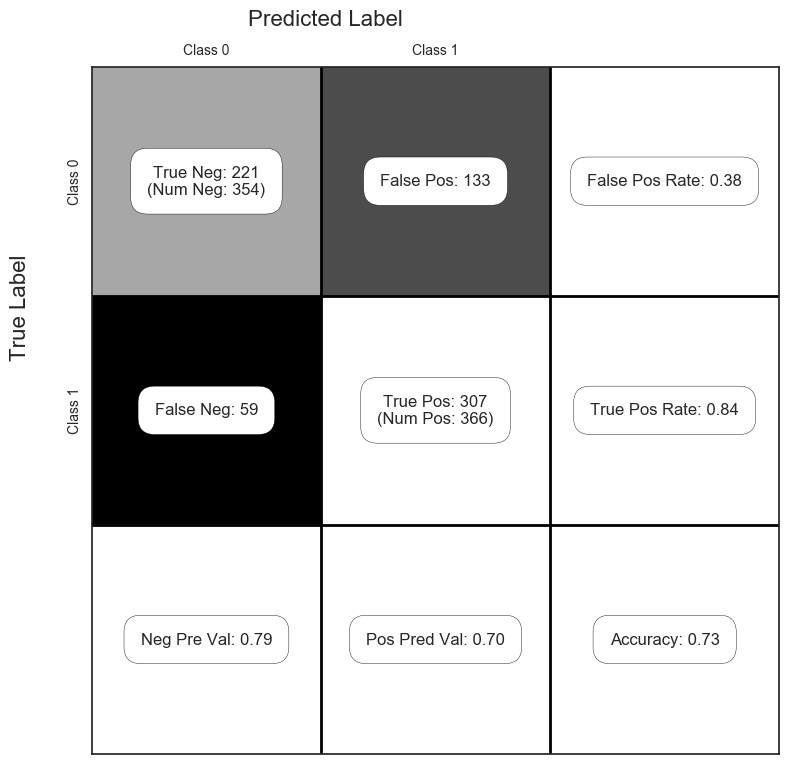

In [40]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [41]:
nlp_ml_functions.classification_metrics("MultinomialNB", y_test_article, predictions)

Precision Score of MultinomialNB model: 69.77%

AUC: 73.15%

Accuracy Score of MultinomialNB model: 73.33%

Recall Score of MultinomialNB model: 83.88%

F1 Score of MultinomialNB model: 76.18%

Classification Report of MultinomialNB:

              precision    recall  f1-score   support

          0       0.79      0.62      0.70       354
          1       0.70      0.84      0.76       366

avg / total       0.74      0.73      0.73       720



### Naive-Bayes Bernoulli.

In [42]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', BernoulliNB())])

In [43]:
parameters = {'classifier__alpha':[1,0.5],
              'classifier__binarize':[1,0],
              'classifier__fit_prior': [True,False]}

In [44]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [45]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 26.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...lary=None)), ('classifier', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__alpha': [1, 0.5], 'classifier__fit_prior': [True, False], 'classifier__binarize': [1, 0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [46]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__alpha': 0.5, 'classifier__fit_prior': True, 'classifier__binarize': 0}


In [47]:
best_model = gridsearch.best_estimator_

In [48]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...bulary=None)), ('classifier', BernoulliNB(alpha=0.5, binarize=0, class_prior=None, fit_prior=True))])

In [49]:
predictions = best_model.predict(X_test_article)

In [50]:
predictions_probability = best_model.predict_proba(X_test_article)

#### Model evaluation.

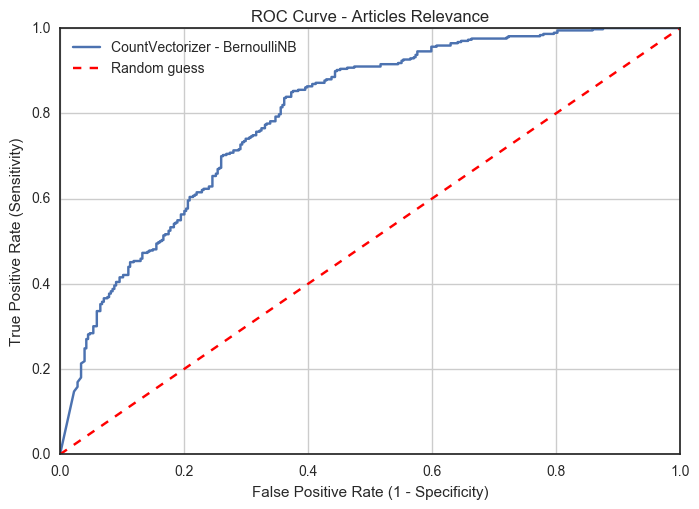

In [51]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - BernoulliNB", "Articles Relevance")

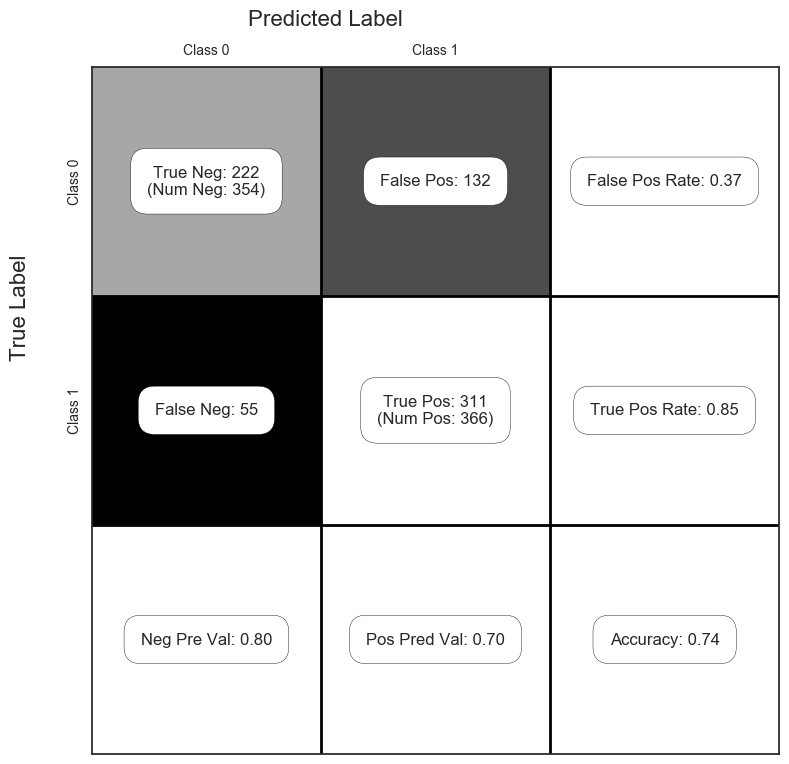

In [52]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [53]:
nlp_ml_functions.classification_metrics("BernoulliNB", y_test_article, predictions)

Precision Score of BernoulliNB model: 70.20%

AUC: 73.84%

Accuracy Score of BernoulliNB model: 74.03%

Recall Score of BernoulliNB model: 84.97%

F1 Score of BernoulliNB model: 76.89%

Classification Report of BernoulliNB:

              precision    recall  f1-score   support

          0       0.80      0.63      0.70       354
          1       0.70      0.85      0.77       366

avg / total       0.75      0.74      0.74       720



### RandomForestClassifier.

In [54]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', RandomForestClassifier())])

In [55]:
parameters = {'classifier__max_depth': [3, 8],
              'classifier__max_features': ['sqrt', 'log2'],
              'classifier__bootstrap': [True, False],
              'classifier__n_estimators': [100],
              'classifier__random_state': [1]}

In [56]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [57]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 26.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__bootstrap': [True, False], 'classifier__n_estimators': [100], 'classifier__random_state': [1], 'classifier__max_depth': [3, 8], 'classifier__max_features': ['sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [58]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__bootstrap': False, 'classifier__n_estimators': 100, 'classifier__random_state': 1, 'classifier__max_depth': 8, 'classifier__max_features': 'log2'}


In [59]:
best_model = gridsearch.best_estimator_

In [60]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...stimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False))])

In [61]:
predictions = best_model.predict(X_test_article)

In [62]:
predictions_probability = best_model.predict_proba(X_test_article)

#### Model evaluation.

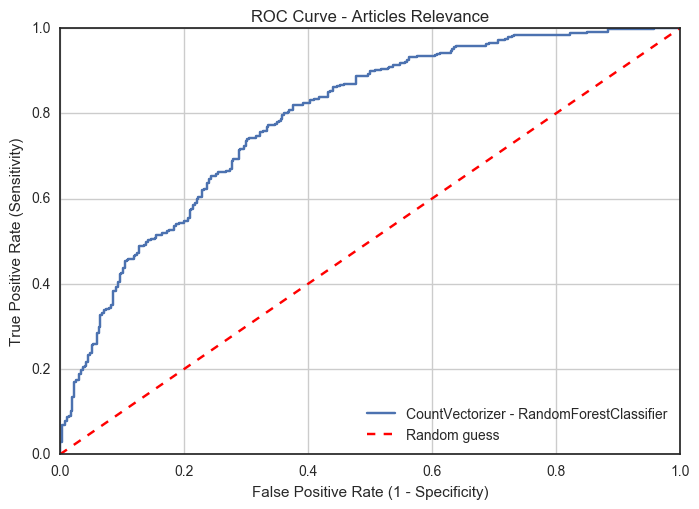

In [63]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - RandomForestClassifier", "Articles Relevance")

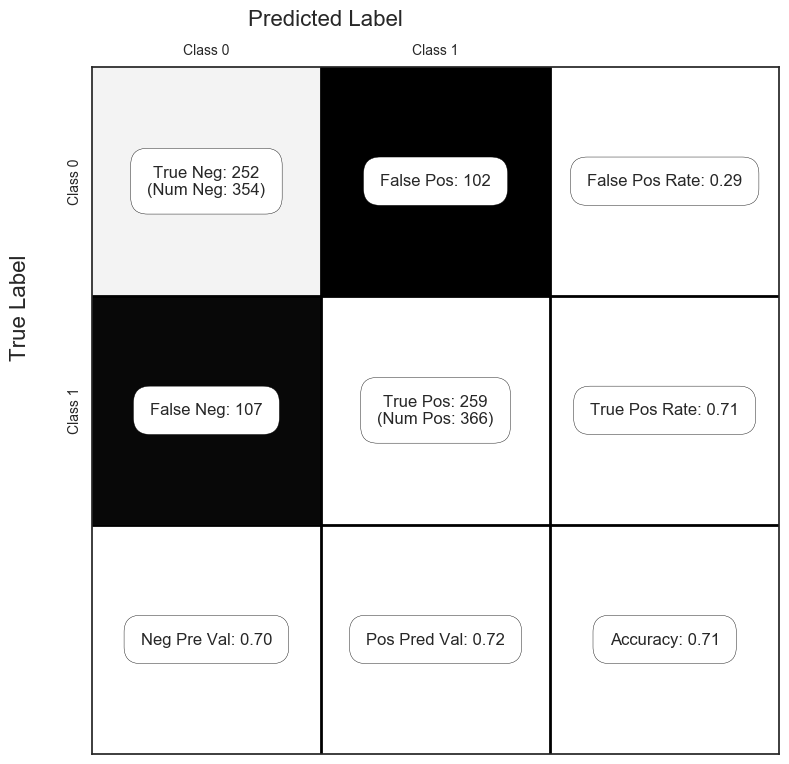

In [64]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [65]:
nlp_ml_functions.classification_metrics("RandomForestClassifier", y_test_article, predictions)

Precision Score of RandomForestClassifier model: 71.75%

AUC: 70.98%

Accuracy Score of RandomForestClassifier model: 70.97%

Recall Score of RandomForestClassifier model: 70.77%

F1 Score of RandomForestClassifier model: 71.25%

Classification Report of RandomForestClassifier:

              precision    recall  f1-score   support

          0       0.70      0.71      0.71       354
          1       0.72      0.71      0.71       366

avg / total       0.71      0.71      0.71       720



### AdaBoostClassifier.

In [66]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', AdaBoostClassifier())])

In [67]:
parameters = {'classifier__learning_rate':[0.1, 0.2],
              'classifier__algorithm': ['SAMME'],
              'classifier__n_estimators':[200,300],
              'classifier__random_state': [1]}

In [68]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [69]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 13.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__algorithm': ['SAMME'], 'classifier__learning_rate': [0.1, 0.2], 'classifier__random_state': [1], 'classifier__n_estimators': [200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [70]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__algorithm': 'SAMME', 'classifier__learning_rate': 0.2, 'classifier__random_state': 1, 'classifier__n_estimators': 200}


In [71]:
best_model = gridsearch.best_estimator_

In [72]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...rithm='SAMME', base_estimator=None, learning_rate=0.2,
          n_estimators=200, random_state=1))])

In [73]:
predictions = best_model.predict(X_test_article)

In [74]:
predictions_probability = best_model.predict_proba(X_test_article)

#### Model evaluation.

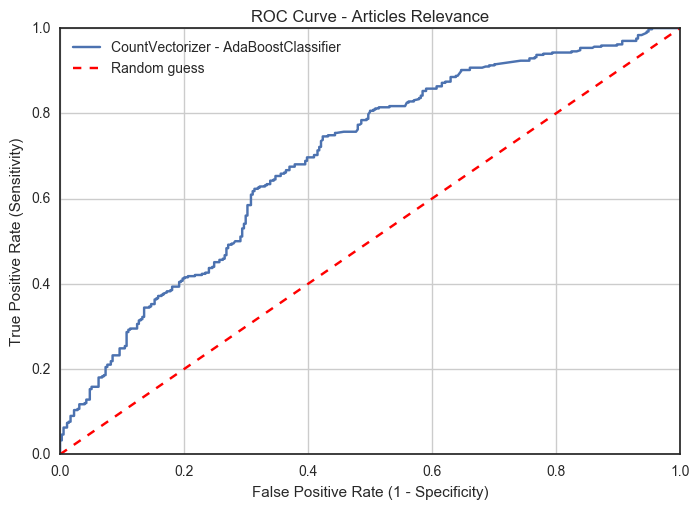

In [75]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - AdaBoostClassifier", "Articles Relevance")

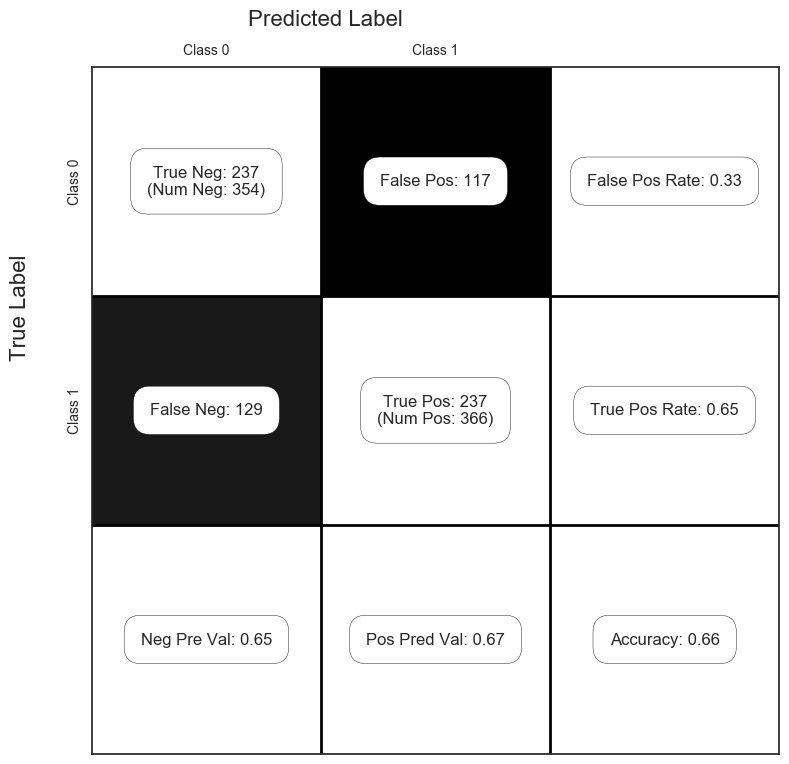

In [76]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [77]:
nlp_ml_functions.classification_metrics("AdaBoostClassifier", y_test_article, predictions)

Precision Score of AdaBoostClassifier model: 66.95%

AUC: 65.85%

Accuracy Score of AdaBoostClassifier model: 65.83%

Recall Score of AdaBoostClassifier model: 64.75%

F1 Score of AdaBoostClassifier model: 65.83%

Classification Report of AdaBoostClassifier:

              precision    recall  f1-score   support

          0       0.65      0.67      0.66       354
          1       0.67      0.65      0.66       366

avg / total       0.66      0.66      0.66       720



### GradientBoostingClassifier.

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

http://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required

In [78]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('to_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),('classifier', GradientBoostingClassifier())])

In [79]:
parameters = {'classifier__learning_rate': [0.1],
              'classifier__max_depth': [3, 6],
              'classifier__max_features': ['sqrt', 'log2'],
              'classifier__n_estimators': [200]}

In [80]:
gridsearch = GridSearchCV(pipeline, 
                          parameters, 
                          #n_jobs=-1, 
                          verbose=1, 
                          scoring='f1')

In [81]:
gridsearch.fit(X_train_article, y_train_article)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 13.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__n_estimators': [200], 'classifier__learning_rate': [0.1], 'classifier__max_depth': [3, 6], 'classifier__max_features': ['sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [82]:
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__max_features': 'sqrt'}


In [83]:
best_model = gridsearch.best_estimator_

In [84]:
best_model.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dcbb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])

In [85]:
predictions = best_model.predict(X_test_article)

In [86]:
predictions_probability = best_model.predict_proba(X_test_article)

#### Model evaluation.

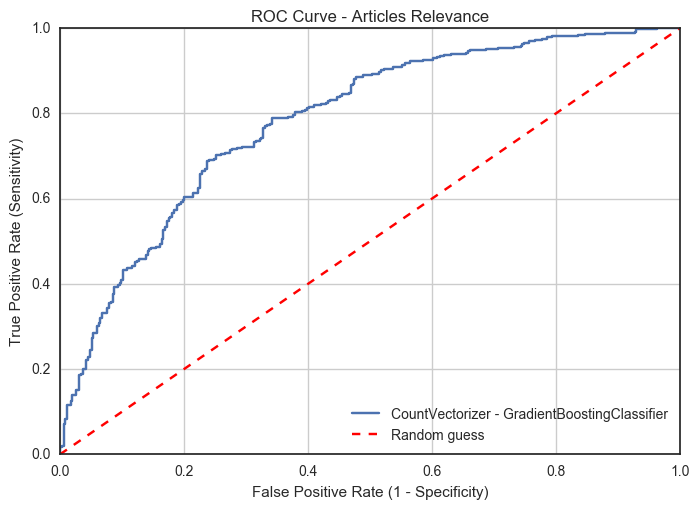

In [87]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - GradientBoostingClassifier", "Articles Relevance")

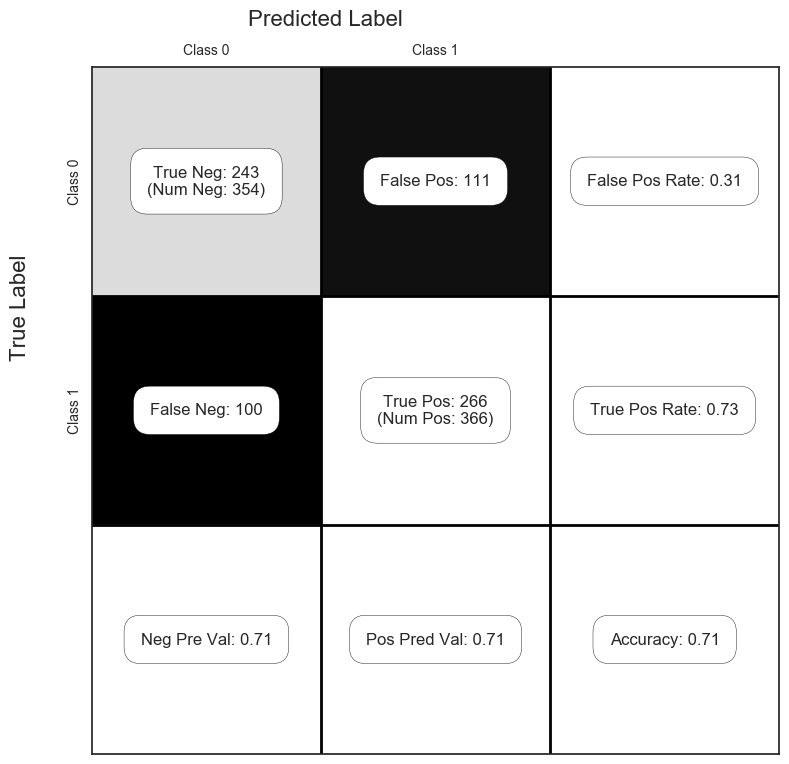

In [88]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [89]:
nlp_ml_functions.classification_metrics("GradientBoostingClassifier", y_test_article, predictions)

Precision Score of GradientBoostingClassifier model: 70.56%

AUC: 70.66%

Accuracy Score of GradientBoostingClassifier model: 70.69%

Recall Score of GradientBoostingClassifier model: 72.68%

F1 Score of GradientBoostingClassifier model: 71.60%

Classification Report of GradientBoostingClassifier:

              precision    recall  f1-score   support

          0       0.71      0.69      0.70       354
          1       0.71      0.73      0.72       366

avg / total       0.71      0.71      0.71       720



### The best models are: MultinomialNB, BernoulliNB and GradientBoostingClassifier based on best:

* Precision (since we are using a balanced dataset, this metric is relevant).
* AUC.
* F1 score (I choose this scoring since it's a weighted average of accuracy and recall).

The best of the three finalists is `BernoulliNB`.